# Detectron2: Inference with pre-trained model
<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Object-Detection-and-Image-Segmentation-with-Detectron2/blob/master/Detectron2_inference_with_pre_trained_model.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Object-Detection-and-Image-Segmentation-with-Detectron2/blob/master/Detectron2_inference_with_pre_trained_model.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

## Install detectron2 (only Google Colab)

> **Important**: If you're running on a local machine, be sure to follow the [installation instructions](https://github.com/facebookresearch/detectron2/blob/master/INSTALL.md). This notebook includes only what's necessary to run in Colab.

In [ ]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

torch:  1.10 ; cuda:  cu111
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
     |████████████████████████████████| 7.0 MB 884 kB/s 
     |████████████████████████████████| 74 kB 3.8 MB/s 
     |████████████████████████████████| 147 kB 63.1 MB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
     |████████████████████████████████| 130 kB 47.4 MB/s 
     |████████████████████████████████| 749 kB 53.2 MB/s 
     |████████████████████████████████| 843 kB 60.2 MB/s 
     |████████████████████████████████| 112 kB 74.1 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220414-py3-none-any.whl size=61211 sha256=2e862a5c3177223e49464c657024f24c0818ac3ac28799d997db6578560f4b2a
  Stored in directory: /root/.cache/pip/wheels/df/f4/b8/7b5df8b6722f4c72315ce70c31aa693e00cef6a5056149bd28
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=d19bf92bc1cb16742aa08b830d2ce3d7d

## Inference with pre-trained model

In [ ]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import cv2

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from torchvision import transforms

We first need to download a image to make predictions on.

 im  (188, 250, 3)
 im1  (224, 224, 3)


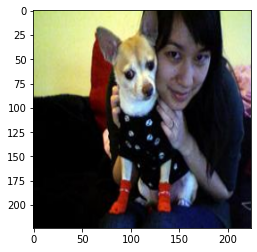

In [ ]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./dog11.jpg")
print(" im ",im.shape)
#t_resized = F.resize(torch.tensor(im), 224)
#plt.imshow(cv2.cvtColor(t_resized, cv2.COLOR_BGR2RGB))
t_resized = cv2.resize(im,(224,224))
plt.imshow(cv2.cvtColor(t_resized, cv2.COLOR_BGR2RGB))

print(" im1 ",t_resized.shape)

In [ ]:
# Create config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")

In [ ]:
# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
outputs = predictor(im)

model_final_f6e8b1.pkl: 243MB [00:06, 35.1MB/s]                          
/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


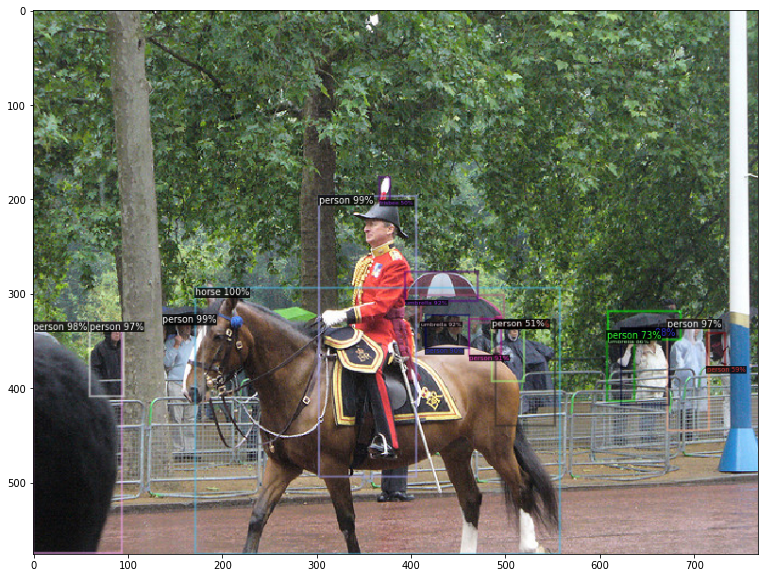

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

## Instance Segmentation

Switching from object detection to instance segmentation is super simple. We only need to change the config file and model weights.

In [ ]:
from google.colab import drive

drive.mount("/content/drive")
import os
import sys

#/content/drive/MyDrive/split_class/split_class
# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a 2022WI folder and put all the files under A4 folder, then "2022WI/A4"
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'split_class/split_class'
GOOGLE_DRIVE_PATH = os.path.join("/content/drive", "MyDrive", GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))
# Add to sys so we can import .py files.
sys.path.append(GOOGLE_DRIVE_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['valid', '.DS_Store', 'test', 'test_annotation', 'train_annotation', 'train', 'valid_annotation', 'test_mask']


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


'545 Final_Project.gdoc'           'Site Map.jpg'
'605 labreport.gdoc'                split_class/
 A2/                                split_class.zip
 A3/                               'Summer research meet.gdoc'
 A4/                                test_mask/
 A5/                                test_mask.zip
'Consulting proposal.gslides'      'test_mask.zip"'
'Copy of checklist.gdoc'           'To professor Andrew.gdoc'
'copy of professionally.gdoc'       two_stage_detector.ipynb
'Copy of 实习协议.gdoc'             tydi-qa-download.ipynb
 cs231n/                           'UC Berkeley interview.gdoc'
 CS231N作业总结.gdoc                UI.ipynb
 dog_dataset_split/                 Untitled
 EECS545/                           Untitled0.ipynb
'Entr 407 Journal 1.gdoc'          'Untitled document (1).gdoc'
'General presentation.gslides'     'Untitled document (2).gdoc'
'Journal 2.gdoc'                   'Untitled document.gdoc'
'Journal 3.gdoc'                   'Untitled presentation (1).gslides

In [ ]:
def makedir(new_dir):
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

In [ ]:
########## 训练集 生成mask
from functools import total_ordering
predictor = DefaultPredictor(cfg)
### 
train_path = os.path.join("drive", "My Drive",GOOGLE_DRIVE_PATH_AFTER_MYDRIVE,"train")
train_pkl_path = os.path.join("drive", "My Drive",GOOGLE_DRIVE_PATH_AFTER_MYDRIVE,"train_pkl")
train_dir_name = os.listdir(train_path)
#print(len(train_dir_name))
for dir_idx in range(len(train_dir_name)):
  each_dir = train_dir_name[dir_idx]
  each_class_path = os.path.join(train_path,each_dir)
  each_class_pkl_path = os.path.join(train_pkl_path,each_dir)
  #打开吉娃娃中的照片
  train_image_name = os.listdir(each_class_path)
  #对每一张图片进行处理
  for images_idx in range(len(train_image_name)):
    print(" proccess ",train_dir_name[dir_idx]," image idx: ",images_idx)
    each_image_path = os.path.join(each_class_path,train_image_name[images_idx])
    each_image_pkl_path = os.path.join(each_class_pkl_path,train_image_name[images_idx][0:-4]+'.pkl')
    im = cv2.imread(each_image_path)
    outputs = predictor(im)
    num_object = outputs['instances'].pred_masks.shape[0]
    
    #处理mask维度[1,h,w]-> [h,w,3]
    
    #创建每个图像的pkl文件
    makedir(each_class_pkl_path)

    #遍历每个图片中每个物体，并生成分割
    total_object_mask = []
    for i in range(num_object):
      #处理mask维度[1,h,w]-> [h,w,3]
      three_dim_mask = torch.zeros_like(torch.tensor(im))
      two_dim = outputs['instances'].pred_masks[i].squeeze()
      #print(" twodim",two_dim.shape)
      for dim in range(3):
        three_dim_mask[:,:,dim] = two_dim
      object_pixel = torch.tensor(im) * three_dim_mask
      total_object_mask.append(object_pixel)
    torch.save(total_object_mask,each_image_pkl_path)
    

 proccess  n02097658-silky_terrier  image idx:  0
 proccess  n02097658-silky_terrier  image idx:  1


/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


Streaming output truncated to the last 5000 lines.
 proccess  n02085782-Japanese_spaniel  image idx:  88
 proccess  n02085782-Japanese_spaniel  image idx:  89
 proccess  n02085782-Japanese_spaniel  image idx:  90
 proccess  n02085782-Japanese_spaniel  image idx:  91
 proccess  n02085782-Japanese_spaniel  image idx:  92
 proccess  n02085782-Japanese_spaniel  image idx:  93
 proccess  n02085782-Japanese_spaniel  image idx:  94
 proccess  n02085782-Japanese_spaniel  image idx:  95
 proccess  n02085782-Japanese_spaniel  image idx:  96
 proccess  n02085782-Japanese_spaniel  image idx:  97
 proccess  n02085782-Japanese_spaniel  image idx:  98
 proccess  n02085782-Japanese_spaniel  image idx:  99
 proccess  n02085782-Japanese_spaniel  image idx:  100
 proccess  n02085782-Japanese_spaniel  image idx:  101
 proccess  n02085782-Japanese_spaniel  image idx:  102
 proccess  n02085782-Japanese_spaniel  image idx:  103
 proccess  n02085782-Japanese_spaniel  image idx:  104
 proccess  n02085782-Japan

In [93]:
import torch 
import torchvision 
import torchvision.transforms as T 
from PIL import Image
import torchvision.transforms.functional as F

In [100]:
#GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'dog_dataset_split/new_dog_dataset'
#GOOGLE_DRIVE_PATH = os.path.join("drive", "My Drive", GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
#!unzip "/content/drive/My Drive/split_class.zip" -d "/content/drive/My Drive/split_class"

!zip -r '/content/drive/My Drive/train_mask_submit.zip' '/content/drive/My Drive/train_mask_submit'

Streaming output truncated to the last 5000 lines.
  adding: content/drive/My Drive/train_mask_submit/n02102480-Sussex_spaniel/n02102480_3717.jpg (deflated 5%)
  adding: content/drive/My Drive/train_mask_submit/n02102480-Sussex_spaniel/n02102480_2622.jpg (deflated 27%)
  adding: content/drive/My Drive/train_mask_submit/n02102480-Sussex_spaniel/n02102480_276.jpg (deflated 9%)
  adding: content/drive/My Drive/train_mask_submit/n02102480-Sussex_spaniel/n02102480_4737.jpg (deflated 37%)
  adding: content/drive/My Drive/train_mask_submit/n02102480-Sussex_spaniel/n02102480_2385.jpg (deflated 8%)
  adding: content/drive/My Drive/train_mask_submit/n02102480-Sussex_spaniel/n02102480_4910.jpg (deflated 9%)
  adding: content/drive/My Drive/train_mask_submit/n02102480-Sussex_spaniel/n02102480_6283.jpg (deflated 20%)
  adding: content/drive/My Drive/train_mask_submit/n02102480-Sussex_spaniel/n02102480_7189.jpg (deflated 11%)
  adding: content/drive/My Drive/train_mask_submit/n02102480-Sussex_spanie

In [95]:

transform = T.ToPILImage()
predictor = DefaultPredictor(cfg)
### 
train_path = os.path.join("/content/drive", "MyDrive",GOOGLE_DRIVE_PATH_AFTER_MYDRIVE,"train")
train_pkl_path = os.path.join("/content/drive", "My Drive","train_mask_submit")
print(train_pkl_path)
train_dir_name = os.listdir(train_path)
print(train_dir_name)
for dir_idx in range(len(train_dir_name)):
  each_dir = train_dir_name[dir_idx]
  if each_dir == ".DS_Store":
    continue
  each_class_path = os.path.join(train_path,each_dir)
  each_class_pkl_path = os.path.join(train_pkl_path,each_dir)
  #打开吉娃娃中的照片
  train_image_name = os.listdir(each_class_path)
  #对每一张图片进行处理
  makedir(each_class_pkl_path)
  print(" create !")
  for images_idx in range(len(train_image_name)):
    #print(" proccess ",train_dir_name[dir_idx]," image idx: ",images_idx)
    each_image_path = os.path.join(each_class_path,train_image_name[images_idx])
    each_image_pkl_path = os.path.join(each_class_pkl_path,train_image_name[images_idx])
    im = cv2.imread(each_image_path)
    im = cv2.resize(im,(224,224))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    outputs = predictor(im)
  #print(outputs['instances'])
    #print(k)
    num_object = outputs['instances'].pred_masks.shape[0]
    
    #处理mask维度[1,h,w]-> [h,w,3]
    
    #创建每个图像的pkl文件
    
    #遍历每个图片中每个物体，并生成分割
    total_object_mask = []
    num_of_dog = 0
    for i in range(num_object):
      if outputs['instances'].pred_classes[i] != 16:
        continue
      #处理mask维度[1,h,w]-> [h,w,3]
      if num_of_dog == 1:
        continue
      num_of_dog+=1
      three_dim_mask = torch.zeros_like(torch.tensor(im))
      two_dim = outputs['instances'].pred_masks[i].squeeze()
      #print(" twodim",two_dim.shape)
      for dim in range(3):
        three_dim_mask[:,:,dim] = two_dim
      object_pixel = torch.tensor(im) * three_dim_mask
      #print(" object_pixel ",object_pixel.shape)
      img_m = transform(object_pixel.permute(2,0,1))
      img_m.save(each_image_pkl_path)
      print(" save succ ",train_dir_name[dir_idx]," have num : ",num_of_dog)
      #print(k)   
      #total_object_mask.append(object_pixel)
      #torch.save(total_object_mask,each_image_pkl_path)

/content/drive/My Drive/train_mask_submit
['n02097658-silky_terrier', 'n02092002-Scottish_deerhound', 'n02099849-Chesapeake_Bay_retriever', 'n02091244-Ibizan_hound', 'n02095314-wire-haired_fox_terrier', 'n02091831-Saluki', 'n02102318-cocker_spaniel', 'n02104365-schipperke', 'n02090622-borzoi', 'n02105505-komondor', 'n02093256-Staffordshire_bullterrier', 'n02089973-English_foxhound', 'n02099601-golden_retriever', 'n02095889-Sealyham_terrier', 'n02085782-Japanese_spaniel', '.DS_Store', 'n02097047-miniature_schnauzer', 'n02105162-malinois', 'n02086079-Pekinese', 'n02097130-giant_schnauzer', 'n02107142-Doberman', 'n02097209-standard_schnauzer', 'n02106662-German_shepherd', 'n02106382-Bouvier_des_Flandres', 'n02094258-Norwich_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02093754-Border_terrier', 'n02105251-briard', 'n02108551-Tibetan_mastiff', 'n02108422-bull_mastiff', 'n02085936-Maltese_dog', 'n02093859-Kerry_blue_terrier', 'n02104029-kuvasz', 'n02107574-Greater_Swis

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


Streaming output truncated to the last 5000 lines.
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n02102480-Sussex_spaniel  have num :  1
 save succ  n

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:09, 18.3MB/s]                           
/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


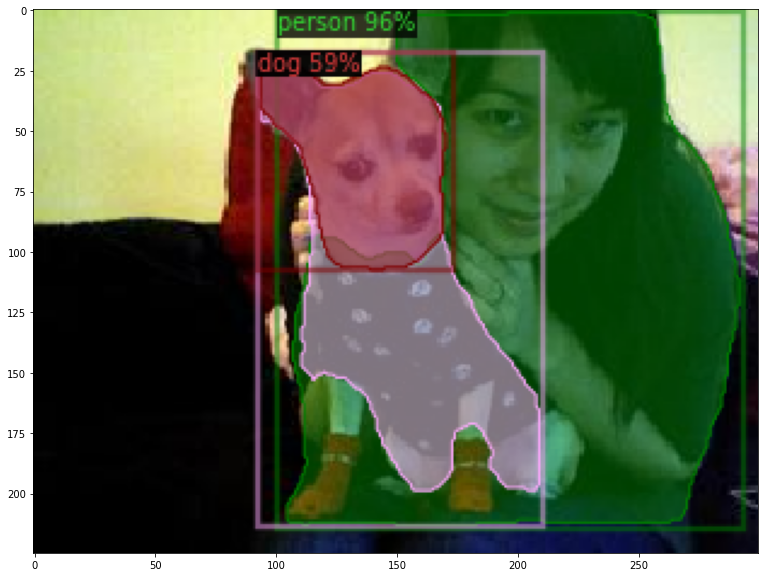

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

You can also use Person Keypoint Detection or Panoptic Segmentation models. For more information check ou the [model zoo](https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md).